In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error


In [2]:
housing_data = pd.read_csv("housing.csv")

In [3]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing_data['total_bedrooms'] = housing_data['total_bedrooms'].fillna((housing_data['total_bedrooms'].sum())/len(housing_data['total_bedrooms']))


housing_data = housing_data[housing_data['median_house_value'] < (housing_data['median_house_value'].max())]


In [14]:
housing_cat = housing_data['ocean_proximity']
housing_cat_encoded,housing_categories = housing_cat.factorize()
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot = housing_cat_1hot.toarray()
ocean_proximity_cat_1hot = pd.DataFrame(housing_cat_1hot)
ocean_proximity_cat_1hot = ocean_proximity_cat_1hot.rename(columns=
                            {0: 'NEAR BAY', 1: '<1H OCEAN', 2:'INLAND', 3:'NEAR OCEAN', 4:'ISLAND'})
housing_data = housing_data.reset_index(drop=True)
housing_data = pd.concat([housing_data, ocean_proximity_cat_1hot], axis=1, sort=False)
housing_data = housing_data.drop('ocean_proximity',axis=1)


In [15]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,NEAR BAY,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND,NEAR BAY,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [16]:
class Tree :
    def __init__ (self,X_train,y_train,X_test,y_test):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        
    def fit_tree (self,depth):
        dTree = DecisionTreeRegressor(max_depth=depth)
        return dTree.fit(self.X_train,self.y_train)
    
    def predict_tree (self,depth):
        pred = self.fit_tree(depth).predict(self.X_test)
        return pred
    
    def evaluate_tree (self,depth):
        mse = mean_squared_error(self.y_test,self.predict_tree(depth))
        rmse = np.sqrt(mse)
        return rmse
        
        
        
        

In [17]:
housing_train, housing_test = train_test_split(housing_data, test_size=0.33, random_state=11)


In [18]:
lat_income_train = Tree(housing_train[['latitude','median_income']],
                        housing_train[['median_house_value']],
                        housing_train[['latitude','median_income']],
                        housing_train[['median_house_value']])

lat_income_test =  Tree(housing_train[['latitude','median_income']],
                        housing_train[['median_house_value']],
                        housing_test[['latitude','median_income']],
                        housing_test[['median_house_value']])

loc_income_train = Tree(housing_train[['latitude','longitude','median_income']],
                        housing_train[['median_house_value']],
                        housing_train[['latitude','longitude','median_income']],
                        housing_train[['median_house_value']])

loc_income_test =  Tree(housing_train[['latitude','longitude','median_income']],
                        housing_train[['median_house_value']],
                        housing_test[['latitude','longitude','median_income']],
                        housing_test[['median_house_value']])


#df.drop('b', axis=1)
all_train = Tree(housing_train.drop('median_house_value',axis=1),
                        housing_train[['median_house_value']],
                        housing_train.drop('median_house_value',axis=1),
                        housing_train[['median_house_value']])

all_test =  Tree(housing_train.drop('median_house_value',axis=1),
                        housing_train[['median_house_value']],
                        housing_test.drop('median_house_value',axis=1),
                        housing_test[['median_house_value']])




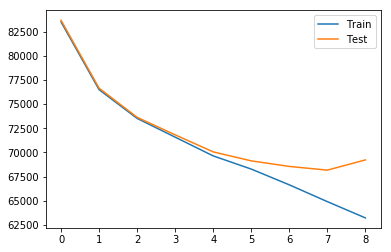

In [26]:
lat_income_results=pd.DataFrame()
train_results = []
test_results = []
for i in range (1,10):
    train_results.append(lat_income_train.evaluate_tree(i))
    test_results.append(lat_income_test.evaluate_tree(i))

lat_income_results['Train']=(train_results)
lat_income_results['Test']=(test_results)
lat_income_results.plot();

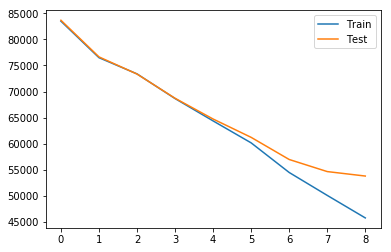

In [27]:
loc_income_results=pd.DataFrame()
train_results = []
test_results = []
for i in range (1,10):
    train_results.append(loc_income_train.evaluate_tree(i))
    test_results.append(loc_income_test.evaluate_tree(i))

loc_income_results['Train']=(train_results)
loc_income_results['Test']=(test_results)
loc_income_results.plot();

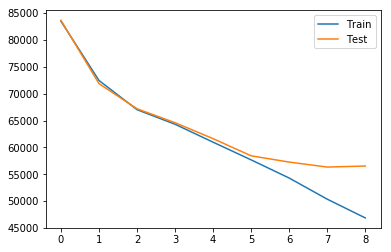

In [28]:
all_results=pd.DataFrame()
train_results = []
test_results = []
for i in range (1,10):
    train_results.append(all_train.evaluate_tree(i))
    test_results.append(all_test.evaluate_tree(i))

all_results['Train']=(train_results)
all_results['Test']=(test_results)
all_results.plot();